# **Aymeric BEILLON et Antoine BERTIN**

# **Introduction**
----------------

### Le but de ce projet est de créer un modèle de classification supervisée, permettant, à partir d'un jeu de données d'une compagnie d'assurance de classer des données. 
Ces données prennent la forme de profils clients, ces profils comprennent de nombreuses informations comme par exemple l'âge, le genre ou le credit score de l'assuré. La donnée importante pour la création de notre modèle et la connaissance de si, oui ou non, l'assuré à fait une demande d'indemnisation, cela pourra permettre à cette compagnie d'assurance de prévoir à l'avance selon le profil de nouveau clients, si ils feront une nouvelle demande. 



## PARTIE 1 | IMPORTATION ET LECTURE DES DONNÉES
Ce premier bout de code permet de récupérer et lire les données depuis notre fichier CSV afin d'avoir une première analyse superficielle, ce faisant, nous pouvons vérifier la forme que prennent ces dites données. Ainsi nous pouvons préciser l'objectif du problème, il faut analyser les données pour prédire la demande d'indemnisation 

In [58]:
#install packages from requirements.txt
pip install -r requirements.txt
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()



first_rows, info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

(       id  age  gender driving_experience    education         income  \
 0  569520    3       0               0-9y  high school    upper class   
 1  750365    0       1               0-9y         none        poverty   
 2  199901    0       0               0-9y  high school  working class   
 3  478866    0       1               0-9y   university  working class   
 4  731664    1       1             10-19y         none  working class   
 
    credit_score  vehicle_ownership vehicle_year  married  children  \
 0      0.629027                1.0   after 2015      0.0       1.0   
 1      0.357757                0.0  before 2015      0.0       0.0   
 2      0.493146                1.0  before 2015      0.0       0.0   
 3      0.206013                1.0  before 2015      0.0       1.0   
 4      0.388366                1.0  before 2015      0.0       0.0   
 
    postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
 0        10238         12000.0        sedan       

# PARTIE 2 | EXAMEN DES DONNÉES
-------
Dans cette partie l'objectif est de déceler, en analysant via des fonctions python, les valeurs manquantes et ou aberrantes présentes dans notre jeu de données. Ici, pour vérifier la présence potentielle de valeurs 'NA', nous allons utiliser la fonction isna() de Pandas, cette fonction permet de retourner ceci sur un DataFrame. Associée à la fonction sum(), nous pouvons retourner le nombre total de valeurs nulles sur chaque colonne. Il est également important de pouvoir vérifier les valeurs aberrantes, pour ce faire nous utilisons la méthode max() de python, permettant de retourner la valeur maximum de chaque colonne. Cette étape de vérification des données est essentielle puisqu'elle permet de savoir les actions à réaliser durant la phase de préparation des données. Pour vérifier les valeurs aberrantes, nous pouvons utiliser un box plot, qui représente les données de manière plus claire pour voir la présence de ces valeurs.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

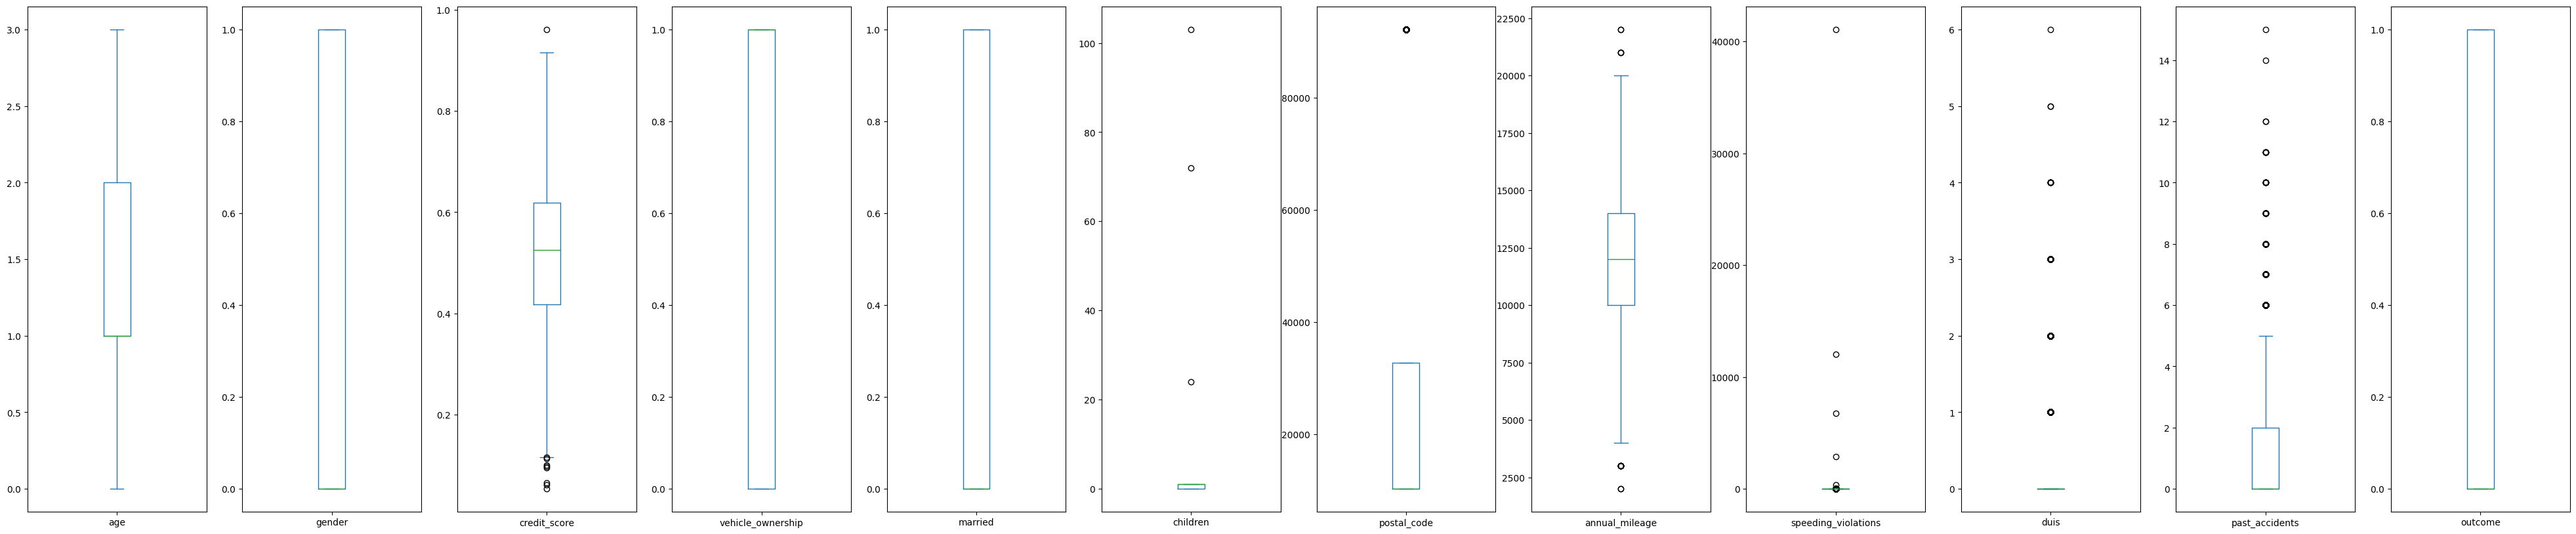

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
id                            999976
age                                3
gender                             1
driving_experience              30y+
education                 university
income                 working class
credit_score                0.960819
vehicle_ownership                1.0
vehicle_year             before 2015
married                          1.0
children                       103.0
postal_code                    92101
annual_mileage               22000.0
vehicle_type        

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()
maxi = data.max()


# Détection des valeurs manquantes
missing_values = data.isna().sum()
data = data.drop(columns=['id'])

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))
plt.show()

first_rows, info, description, missing_values


## Affichage du nombre de données manquantes pour chaque colonne
print(missing_values)
print(maxi)


Ici nous pouvons ainsi repérer deux colonnes (credit_score et annual_mileage) qui comporte respectivement 982 et 957 valeurs manquantes. 
Afin de pouvoir travailler avec ces colonnes, il existe plusieurs solutions. Celles-ci peuvent être: 
- Suppression de la colonne
- Imputation des valeurs manquantes à une valeur médiane
- Mise à la valeur la plus courante

Dans notre cas, le plus intéressant sera l'imputation à une valeur médiane afin de conserver le plus de cohérence sur les données

Nous observons également des valeurs dites "aberrantes", qui sont trop élevées sans faire de sens, pour celle-ci, nous appliquerons une méthode permettant de limiter les valeurs entre des bornes. Ce box plot permet de voir clairement les valeurs aberrantes, pusique nous pouvons voir une valeur d'enfant au delà de 100, ceci ne faisant pas de sens, il sera nécessaire de la modifier dans la préparation de données

# PARTIE 3 PREPARATION DES DONNEES
-----
 
Comme mentionné précédemment, nos données contiennent des valeurs manquantes ('NA') et des valeurs aberrantes. Dans cette phase de préparation des données, nous allons imputer ces valeurs et lisser le jeu de données afin d'obtenir un dataset cohérent, sur lequel nous pourrons travailler.

Pour ce faire en Python, nous utiliserons des méthodes provenant du package scikit-learn, qui contient de nombreuses fonctions utiles pour manipuler les jeux de données. Pour imputer les valeurs à la médiane, nous utiliserons la classe SimpleImputer, qui permet de choisir la méthode d'imputation à utiliser. Ici, nous opterons pour l'imputation à la valeur médiane.

Les lignes de code suivantes montrent comment transformer les valeurs manquantes en utilisant les règles définies par notre imputeur. 

Ensuite, pour limiter les valeurs aberrantes, nous utiliserons une fonction lambda (une méthode anonyme). Cette fonction lambda applique le nombre minimum entre la valeur présente dans la colonne et un seuil fixé (10 pour speeding_violations et 5 pour children).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

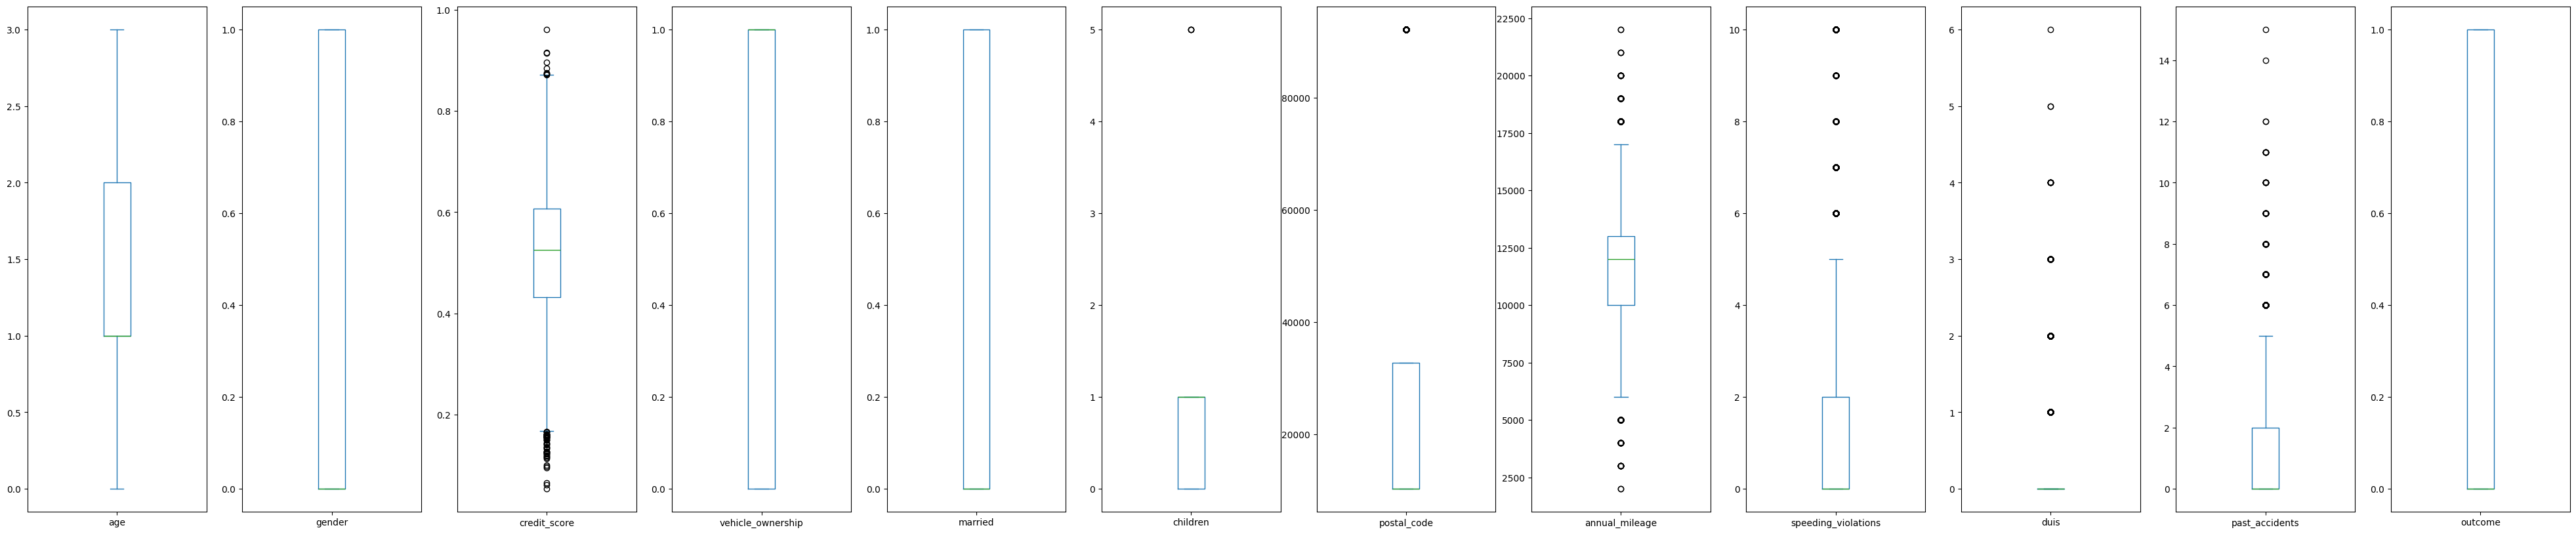

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


#suppression de la valeur inutile
data = data.drop(columns=['id'])

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])


print(first_rows)

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))
data['children'] = data['children'].apply(lambda x: min(x, 5))

missing_values = data.isnull().sum()

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))


# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', LabelEncoder(), categorical_features)
    ])

print(missing_values)



Après avoir préparé les données nous pouvons de nouveau les analyser comme fait dans la partie précédente. 
Nous n'avons ainsi plus de valeurs nulles, ni de valeurs aberrantes, notre jeu de données est donc prêt pour les parties suivantes:  la recherche de corellations et l'entraînement de notre modèle.

# PARTIE 4 | RECHERCHE DE CORRÉLATION
----------
Un jeu de données est un ensemble complet de données utilisé pour entraîner un modèle. Pour évaluer la performance de ce modèle, on le teste souvent sur un jeu de données de validation, qui est un sous-ensemble distinct non utilisé lors de l'entraînement. La séparation entre le jeu de données d'entraînement et celui de validation se fait de manière totalement aléatoire, afin d'obtenir des résultats représentatifs.


En entraînant le modèle sur le premier jeu, on ajuste ses paramètres pour obtenir les meilleures prédictions possibles. Ensuite, on utilise le jeu de validation pour tester le modèle et s'assurer qu'il génère des résultats fiables sur des données non vues. Tester, c'est explorer les capacités du modèle pour découvrir ses points forts et faibles, tandis que valider consiste à prouver que les prédictions du modèle sont correctes et généralisables.


Une bonne analogie serait celle d'un élève en mathématiques qui s'entraîne avec des exercices préparatoires (les TD) avant de passer un examen (le DS). Après l'entraînement initial, il peut s'exercer davantage avec d'autres exercices similaires pour s'assurer qu'il maîtrise bien les concepts, de la même manière qu'on utilise des données de validation pour confirmer la robustesse d'un modèle entraîné.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

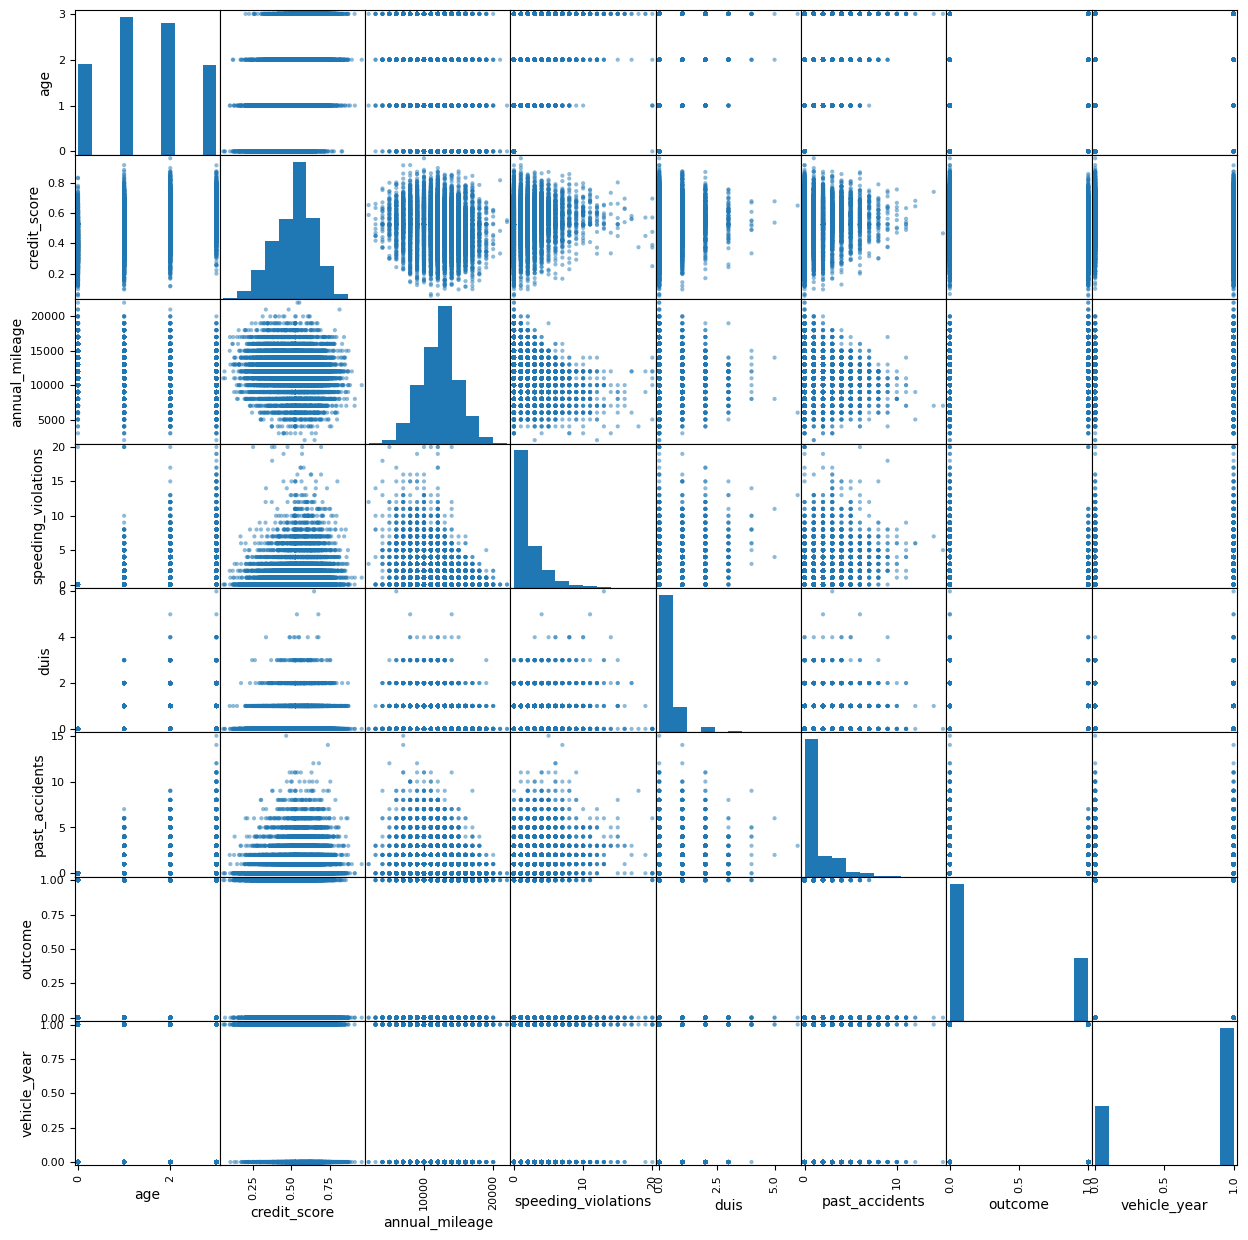

<Axes: >

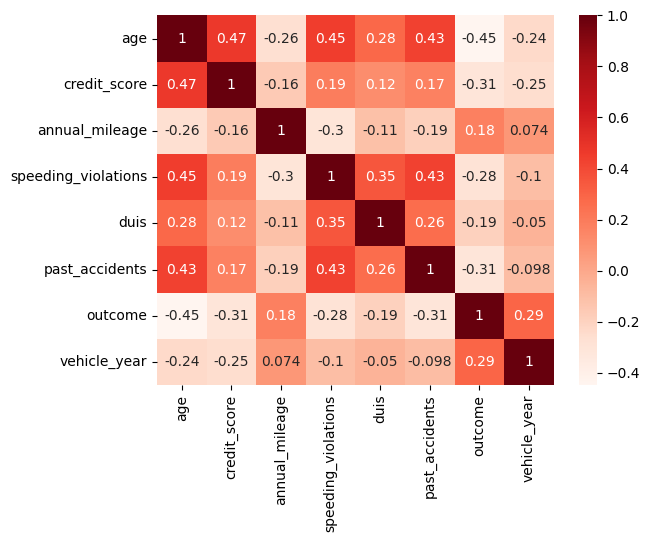

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 20))
data['children'] = data['children'].apply(lambda x: min(x, 5))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

numeric_data = data[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome','vehicle_year']]

cor = numeric_data.corr()
scatter_matrix = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15))


plt.show()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

# PARTIE 5 | EXTRACTION DES JEUX D'APPRENTISSAGE ET DE TEST
----------
Pour tester et valider notre algorithme nous pouvons procéder de deux manières.

la première en entraînant notre algorithme avec une partie des données et ensuite valider l'entraînement des données avec l’autre partie.

On peut partir sur une base de 75% de données d'entraînement et ensuite 25% de données de validation. Cette répartition est assez arbitraire. En effet nous ne possédons pas un nombre données illimités et donc si on entraîne notre algorithme avec peu de données pour ne pas sur entraîner notre algorithme. Ce qui donnerait des résultats erronés. 

Cependant nous ne pouvons pas prévenir des erreurs en entraînant notre algorithme.

Nous pouvons donc utiliser une autre méthode qui consiste à répéter l'entraînement de données et de validation et en faire une moyenne, c’est la validation croisée

Elle consiste à diviser notre jeu de données en plusieurs parties. Ensuite une de ses parties sera celle de test tandis que les autres seront celles à entraîner. On répète le processus en changeant la partie a tester avec les parties à entraîner. A la fin on fait une moyenne des différentes phases d'entraînement et de test.

Pour faire ceci en Python, nous allons utiliser des méthodes provenant du package scikit-learn. 

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)


# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)
missing_values = data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  